# Aprendizaje Supervisado
# UdeSA, 2023
## Profesores: Marcela Svarc, Juan Manuel Pérez


## TP: Clasificación de tópicos de noticias



Vamos a comenzar viendo de armar un modelo de bolsa de palabras. Para ello, utilizaremos `CountVectorizer` de `sklearn`


In [1]:
%pip install numpy



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparision of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guid

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

textos = [
    "bolsa de palabras",
    "palabras de bolsa",
    "bolsa es una palabra",
    "palabra es una bolsa",
    "palabra no es una bolsa",
    "bolsa es una bolsa",
    "bolsa es una bolsa y es una palabra",
    "bolsa bolsa bolsa palabra es es una una y",
]

vect = CountVectorizer()
# Si quisieramos que considere en el diccionario secuencia de un caracter (como la palabra "y", hay que modificar el parámetro token_pattern al instanciar CountVectorizer
# vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
vect.fit(textos)

CountVectorizer()

En `vect.vocabulary_` podemos encontrar el vocabulario construido por `CountVectorizer`

In [4]:
#Acá vemos el diccionario con las palabras y el índice que le asigna a cada una
vect.vocabulary_

{'bolsa': 0, 'de': 1, 'palabras': 5, 'es': 2, 'una': 6, 'palabra': 4, 'no': 3}

`vect.transform` convierte un conjunto de textos en su representación matricial

In [5]:
vect.transform(textos).todense()

matrix([[1, 1, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 1, 1, 0, 1],
        [2, 0, 1, 0, 0, 0, 1],
        [2, 0, 2, 0, 1, 0, 2],
        [3, 0, 2, 0, 1, 0, 2]])

Armemos un dataframe para que nos muestre qué significa cada columna de la matriz

In [6]:
import pandas as pd

# Doy vuelta y ordeno el vocabulario (perdón por lo horrendo)
vocab = {v:k for k, v in vect.vocabulary_.items()}
columns = [vocab[k] for k in range(len(vocab))]

df = pd.DataFrame(
    vect.transform(textos).todense(),
    columns=columns
)

df["text"] = textos

df

,bolsa,de,es,no,palabra,palabras,una,text
0,1,1,0,0,0,1,0,bolsa de palabras
1,1,1,0,0,0,1,0,palabras de bolsa
2,1,0,1,0,1,0,1,bolsa es una palabra
3,1,0,1,0,1,0,1,palabra es una bolsa
4,1,0,1,1,1,0,1,palabra no es una bolsa
5,2,0,1,0,0,0,1,bolsa es una bolsa
6,2,0,2,0,1,0,2,bolsa es una bolsa y es una palabra
7,3,0,2,0,1,0,2,bolsa bolsa bolsa palabra es es una una y


Este modelo se llama de "unigramas" porque sólo considera apariciones de una única palabra. ¿Podemos extender esto?

## n-gramas

Una forma de agregar cierto orden  es mediante el uso de n-gramas.

In [7]:

vect = CountVectorizer(ngram_range=(1, 2))

vect.fit(textos)

# Doy vuelta y ordeno el vocabulario (perdón por lo horrendo)
vocab = {v:k for k, v in vect.vocabulary_.items()}
columns = [vocab[k] for k in range(len(vocab))]

df = pd.DataFrame(
    vect.transform(textos).todense(),
    columns=columns
)

df["text"] = textos


pd.options.display.max_columns = 50

df

,bolsa,bolsa bolsa,bolsa de,bolsa es,bolsa palabra,de,de bolsa,de palabras,es,es es,es una,no,no es,palabra,palabra es,palabra no,palabras,palabras de,una,una bolsa,una palabra,una una,text
0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,bolsa de palabras
1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,palabras de bolsa
2,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,bolsa es una palabra
3,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,palabra es una bolsa
4,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,palabra no es una bolsa
5,2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,bolsa es una bolsa
6,2,0,0,2,0,0,0,0,2,0,2,0,0,1,0,0,0,0,2,1,1,0,bolsa es una bolsa y es una palabra
7,3,2,0,0,1,0,0,0,2,1,1,0,0,1,1,0,0,0,2,0,0,1,bolsa bolsa bolsa palabra es es una una y


## Conjunto de datos



Vamos a utilizar el conjunto de datos [AG News](https://huggingface.co/datasets/ag_news). Cada instancia del conjunto de datos consiste en un título y un cuerpo de una noticia, y una etiqueta que indica la categoría a la que pertenece. Las categorías son: 'World', 'Sports', 'Business' y 'Sci/Tech'.

| Texto                                                                                           | Categoría |
| ----------------------------------------------------------------------------------------------- | --------- |
| Wall St. Bears Claw Back Into the Black (Reuters) Reuters -.                                    | Business  |
| VIEW: Arafats ghost Barry Rubin Rarely in history has a political movement ...                  | World     |
| Tough loss for Pavano, Marlins ATLANTA -- All-Star pitcher Carl Pavano ...                      | Sports    |
| Digital ways to have fun including an HP-branded version of Apple's iPod - designed with an ... | Sci/Tech  |


In [8]:
from datasets import load_dataset

# Con esto lo bajamos de este repositorio centralizado
ds = load_dataset("ag_news")
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

In [9]:
vect = CountVectorizer()
# Si quisieramos que considere en el diccionario secuencia de un caracter (como la palabra "y", hay que modificar el parámetro token_pattern al instanciar CountVectorizer
# vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
vect.fit(ds["train"]["text"])

CountVectorizer()

In [10]:
vect.vocabulary_

{'wall': 62536,
 'st': 54842,
 'bears': 7396,
 'claw': 12600,
 'back': 6510,
 'into': 30178,
 'the': 57946,
 'black': 8345,
 'reuters': 48864,
 'short': 52479,
 'sellers': 51606,
 'street': 55636,
 'dwindling': 18921,
 'band': 6832,
 'of': 40992,
 'ultra': 60125,
 'cynics': 15556,
 'are': 5306,
 'seeing': 51513,
 'green': 25524,
 'again': 3522,
 'carlyle': 11003,
 'looks': 34641,
 'toward': 58949,
 'commercial': 13334,
 'aerospace': 3403,
 'private': 45497,
 'investment': 30295,
 'firm': 22407,
 'group': 25738,
 'which': 63232,
 'has': 26655,
 'reputation': 48499,
 'for': 22995,
 'making': 35425,
 'well': 63065,
 'timed': 58419,
 'and': 4589,
 'occasionally': 40897,
 'controversial': 14176,
 'plays': 44291,
 'in': 29098,
 'defense': 16298,
 'industry': 29401,
 'quietly': 46559,
 'placed': 44156,
 'its': 30678,
 'bets': 7935,
 'on': 41274,
 'another': 4839,
 'part': 42792,
 'market': 35869,
 'oil': 41112,
 'economy': 19185,
 'cloud': 12795,
 'stocks': 55419,
 'outlook': 41907,
 'soaring

In [11]:
#matriz=vect.transform(ds["train"]["text"]).todense()

In [12]:
#import numpy as np
#np.max(matriz)

In [13]:
# Convertimos a pandas

id2label = ds["train"].features["label"].names

df_train = ds["train"].to_pandas()

df_test = ds["test"].to_pandas()

In [14]:
df_train

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


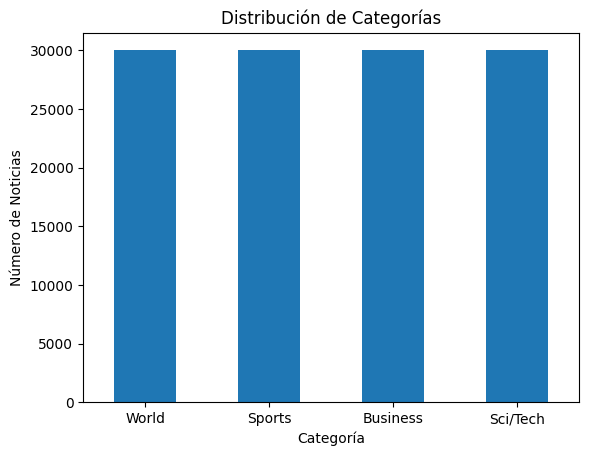

In [15]:
import matplotlib.pyplot as plt

# Cantidad de noticias por categoría
noticias_categoria = df_train['label'].value_counts()

# Grafico
noticias_categoria.plot(kind='bar')  
plt.title('Distribución de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Número de Noticias')
plt.xticks([0,1,2,3], ['World', 'Sports', 'Business', 'Sci/Tech'], rotation=0)
plt.show()


Se ve en el gráfico de arriba que la distribución de las noticias por categoría en la muestra de entrenamiento es bastante equilibrada y todas están representadas en proporciones similares en la muestra de entrenamiento.

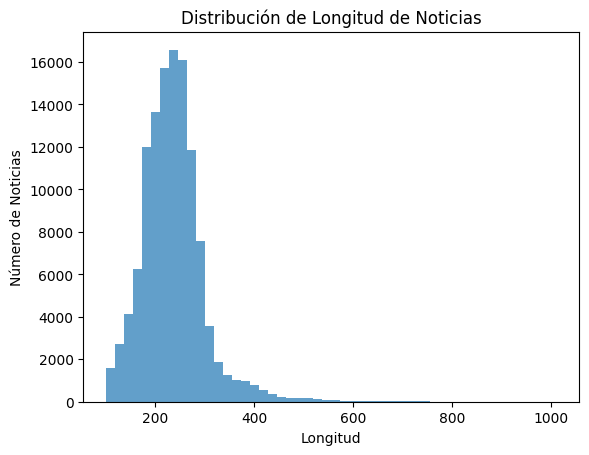

In [16]:
# Calcular la longitud de cada noticia
df_train['text_length'] = df_train['text'].apply(len)

# Visualizar la distribución de longitudes
plt.hist(df_train['text_length'], bins=50, alpha=0.7)
plt.title('Distribución de Longitud de Noticias')
plt.xlabel('Longitud')
plt.ylabel('Número de Noticias')
plt.show()


En el histograma se puede observar la frecuencia de noticias según su longitud. La mayoría de las noticias tienen una longitud que está en el rango de 200 a 400 palabras. La distibución es bastante simétrica, sugiriendo una distribución normal o gaussiana. Esto, podría estar dando un indicio de que no hay un sesgo hacia noticias muy cortas o muy largas.

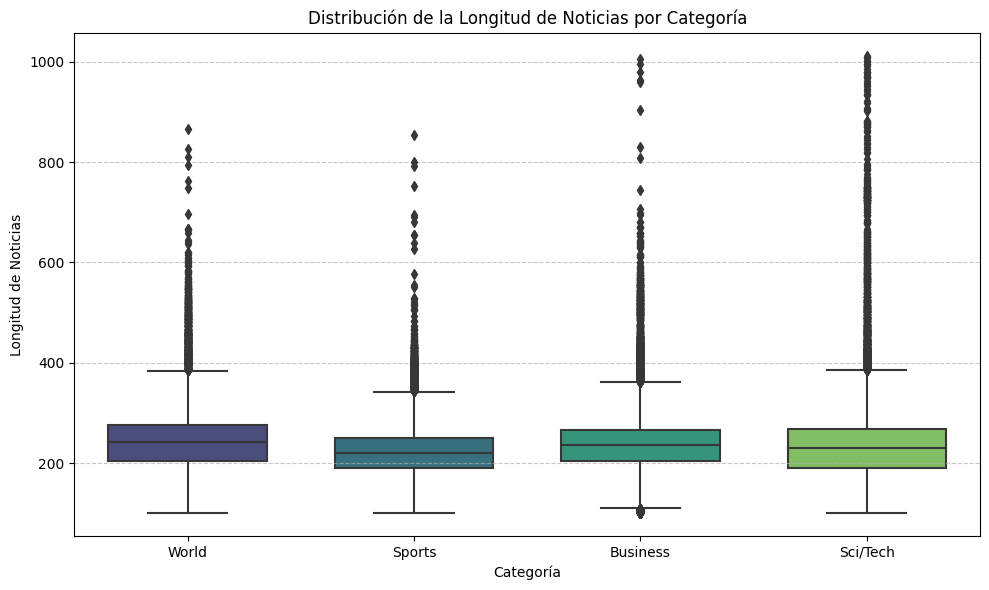

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna en el DataFrame para la longitud de las noticias
df_train['length'] = df_train['text'].apply(len)

# Crear el boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df_train, palette='viridis', width=0.7, saturation=0.7)
plt.title('Distribución de la Longitud de Noticias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Longitud de Noticias')
plt.xticks([0,1,2,3], ['World', 'Sports', 'Business', 'Sci/Tech'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [28]:
!pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_10_9_universal2.whl size=217170 sha256=1fac1ba9287f2f242ce4dea5d8b5fe012c5cffc08348cedecbd3dfd1a64a7d1b
  Stored in directory: /Users/agustineckerdt/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud

[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


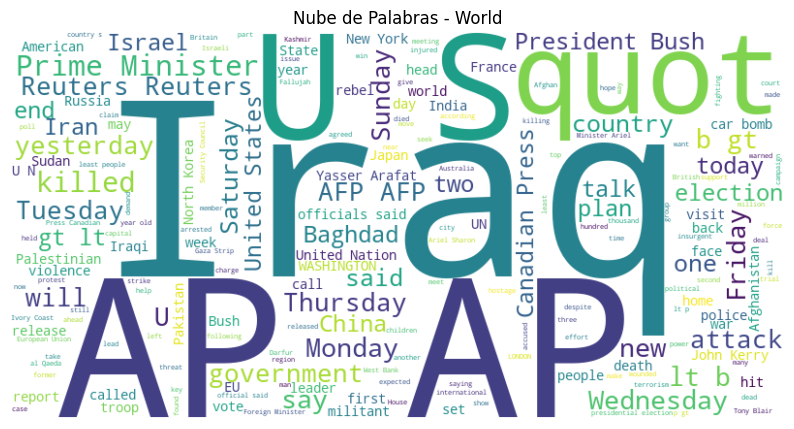

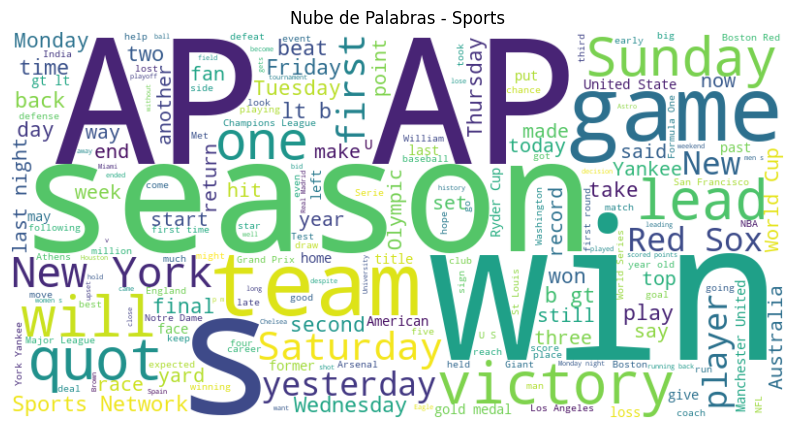

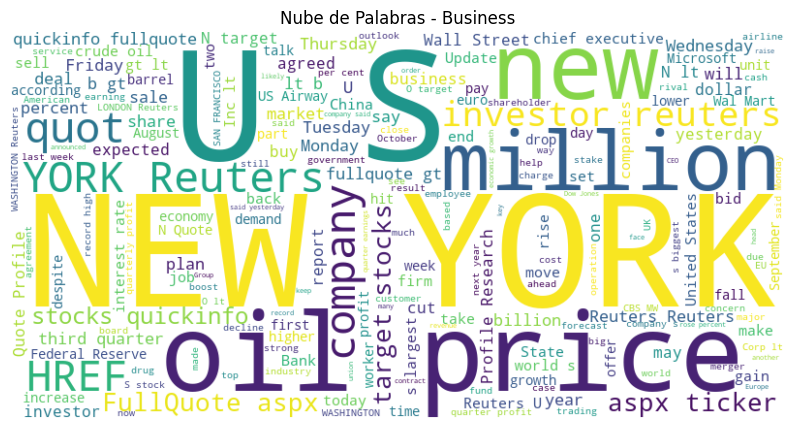

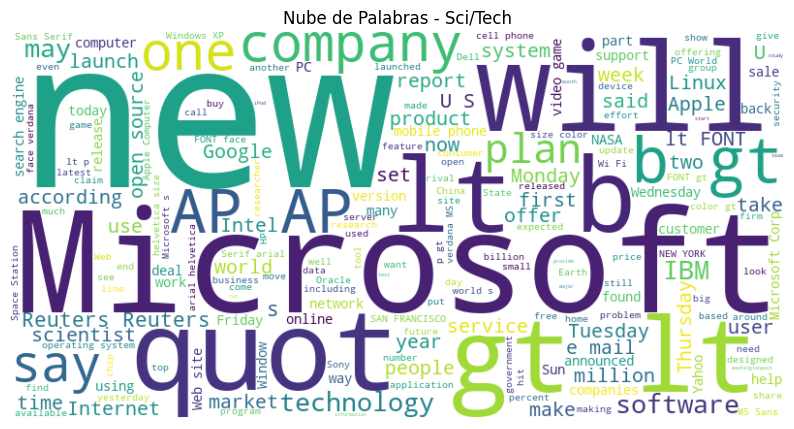

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para generar y mostrar una nube de palabras
def plot_word_cloud(text, title):
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Crear una nube de palabras para cada categoría
categories = ['World', 'Sports', 'Business', 'Sci/Tech']
for i, category in enumerate(categories):
    text = ' '.join(df_train[df_train['label'] == i]['text'].values)
    plot_word_cloud(text, f'Nube de Palabras - {category}')


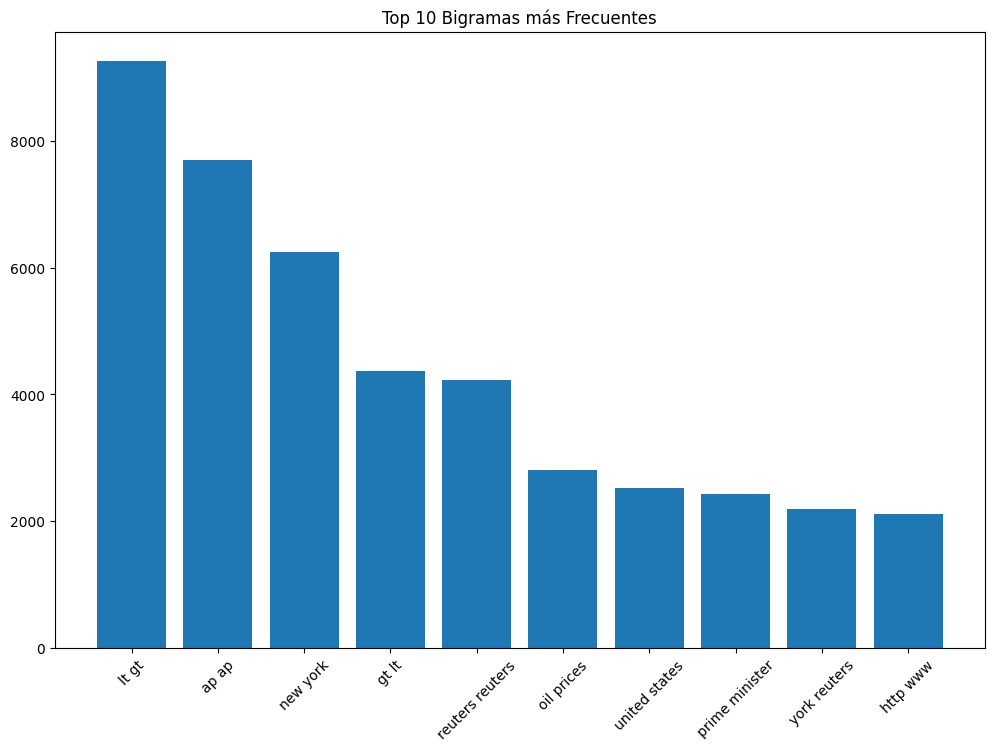

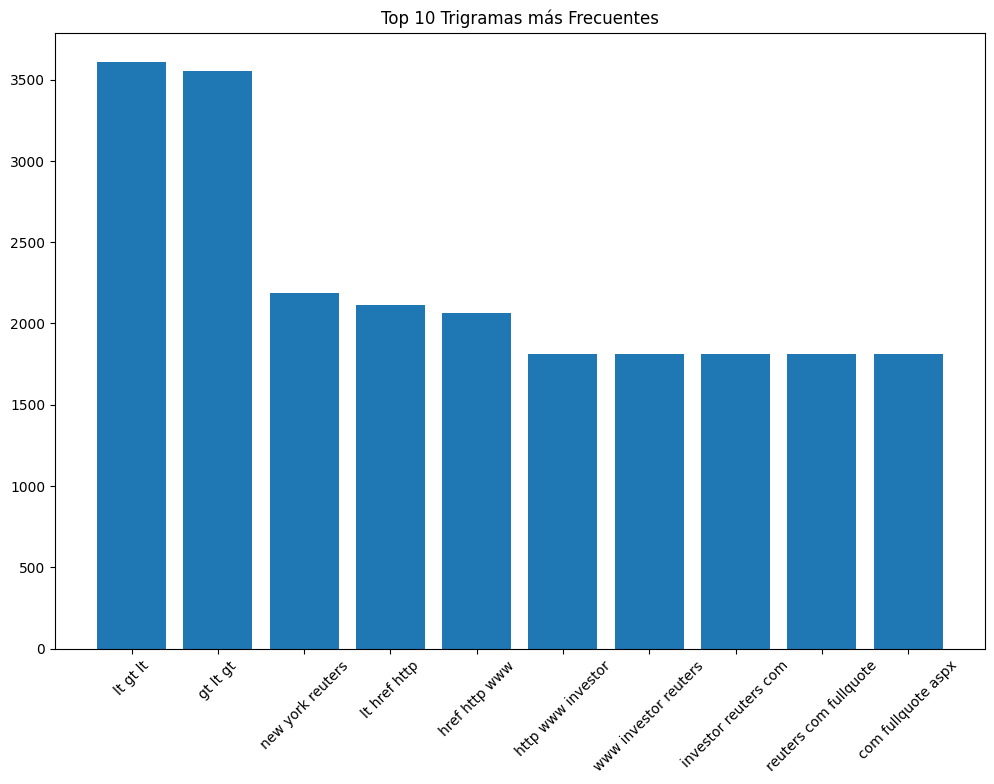

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Función para visualizar los N-gramas más comunes
def plot_top_ngrams(text, ngram_range, top_n, title):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text)
    bag_of_words = vectorizer.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_n_words = words_freq[:top_n]
    
    x_vals, y_vals = zip(*top_n_words)
    
    plt.figure(figsize=(12, 8))
    plt.bar(x_vals, y_vals)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Visualizar los top 10 bigramas
plot_top_ngrams(df_train['text'], (2, 2), 10, 'Top 10 Bigramas más Frecuentes')

# Visualizar los top 10 trigramas
plot_top_ngrams(df_train['text'], (3, 3), 10, 'Top 10 Trigramas más Frecuentes')


In [18]:
# Leemos algunas noticias de cada cateogría para tener de referencia
categoria = ['World', 'Sports', 'Business', 'Sci/Tech']

for idx, categoria in enumerate(categoria):
    print(f"\nCategoría: {categoria}\n")
    sample_texts = df_train[df_train['label'] == idx]['text'].sample(3).tolist()
    for text in sample_texts:
        print(text)
        print("-"*50)



Categoría: World

Amnesty Condemns U.S. for War on Terror Torture  LONDON (Reuters) - The United States has manifestly failed  to uphold obligations to reject torture and cruel, inhuman or  degrading behavior in the "war on terror" launched after Sept.  11, 2001, Amnesty International said Wednesday.
--------------------------------------------------
U.S. Commanders: Fallujah Fight Not Over (AP) AP - American commanders are expressing confidence that the Fallujah offensive will restore order in that hotbed of Sunni resistance, but they caution that much fighting remains.
--------------------------------------------------
Death toll at Poso explosion rises to five JAKARTA (Agencies): The death toll at Saturday #39;s explosion near a police station in Central Sulawesi rose to five people, police said.
--------------------------------------------------

Categoría: Sports

Longwell barely makes game-winning field goal HOUSTON - Green Bay quarterback Brett Favre got a chance to work his fo

In [19]:
# Tomamos una proporción de la muestra de entrenamiento para que el entrenamiento sea más eficiente computacionalmente
muestra_fraccion = 0.001
df_train_muestra= df_train.sample(frac=muestra_fraccion, random_state=42)

# Hacemos el pre procesamiento con count_vectorizer()
vect = CountVectorizer()
X_train = vect.fit_transform(df_train_muestra['text'])
y_train = df_train_muestra['label']


A continuación vamos a generar una visualización primaria

In [20]:

# Obtener el vocabulario generado por el CountVectorizer
vocabulario = vect.get_feature_names_out()

# Mostrar las primeras 50 palabras del vocabulario
print(vocabulario[:50])

# Si deseas conocer el tamaño total del vocabulario
print("\nTamaño total del vocabulario:", len(vocabulario))



['000' '02' '04' '08' '10' '100' '11' '110' '118' '12' '12th' '13' '14'
 '140' '147' '15' '151' '16' '17' '18' '1990' '1990s' '20' '200' '2000'
 '2004' '21' '217' '22' '24' '25' '26' '28' '32' '34' '347' '35' '36'
 '362' '37' '38' '39' '3g' '400' '4452' '46' '479' '4b' '4q' '50']

Tamaño total del vocabulario: 1936


salieron solo numeros... vamos a ver alguna salida de la muestra tomada para chequear que se haya tomado bien la muestra

In [21]:
for text in df_train_muestra['text'].sample(10):
    print(text)
    print('-'*80)

US genocide charge is Bush election ploy - Sudan FM (AFP) AFP - Sudan's foreign minister rejected US charges of genocide in the western region of Darfur as a reelection ploy by US President George W. Bush.
--------------------------------------------------------------------------------
Update 1: Lockheed to Cut 4Q Earnings on Suit Loss Lockheed Martin Corp. Monday said a court ruling in its dispute with the Department of Energy and the state of Idaho will reduce fourth-quarter earnings by \$110 million.
--------------------------------------------------------------------------------
Construction Spending Hits All-Time High WASHINGTON - Construction spending surged in August to the highest level on record, while manufacturing grew at a slower pace in September, offering mixed signals about the economy's strength.    The Commerce Department reported Friday that the value of buildings put in place clocked in at a seasonally adjusted annual rate of \$1.02 trillion, a record high...
-------

Se usa el parámtro token_pattern de la librería de sklearn para capturar palabras alfabéticas e ignorar los números (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [22]:
vect = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')  # Esto excluye los números y captura solo palabras alfabéticas
X_train = vect.fit_transform(df_train_muestra['text'])
# Obtener y mostrar el vocabulario
vocabulario_alfabetico = vect.get_feature_names_out()

print(vocabulario_alfabetico[:50])  # Mostramos las primeras 50 palabras del vocabulario

['a' 'ababa' 'abbey' 'abducted' 'about' 'abtahi' 'abusing' 'accept'
 'accepted' 'access' 'accomplished' 'according' 'activists' 'activities'
 'activity' 'add' 'addis' 'adjusted' 'administration' 'admits' 'admitted'
 'adults' 'advanced' 'advertising' 'aerospace' 'affect' 'afghan'
 'afghanistan' 'afp' 'africa' 'african' 'after' 'aftermath' 'afternoon'
 'ag' 'again' 'against' 'agency' 'ago' 'agree' 'agreed' 'agreement'
 'ahead' 'aide' 'air' 'airline' 'airways' 'al' 'alarming' 'alaska']


ENTRENAMIENTO

In [23]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [24]:
# Regresión logística
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_test=lr.predict(X_train)
np.unique(y_test)

array([0, 1, 2, 3])

In [25]:
# SVM
from sklearn.svm import LinearSVC

svc = LinearSVC(max_iter=10000)
svc.fit(X_train, y_train)
svc.fit(X_train, y_train)
y_test=lr.predict(X_train)
np.unique(y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([0, 1, 2, 3])

Tips:

- Usar `Pipeline` de `sklearn` para armar el pipeline de preprocesamiento y clasificación todo en uno. Mirar la documentación para ver cómo se usa.

- Pegarle un vistazo a Tf-Idf en la parte de "Feature Extraction" de `sklearn`.